# <center> **Decision Trees and Random Forest** </center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris = load_iris(as_frame=True)['frame']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


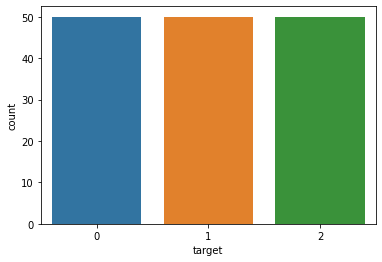

In [5]:
sns.countplot(data=iris,x='target')
plt.show()

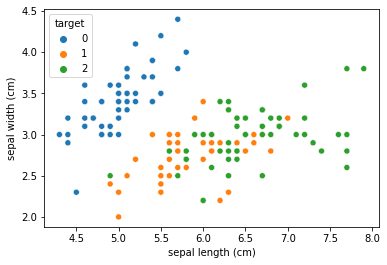

In [6]:
sns.scatterplot(data=iris,
               x = 'sepal length (cm)',
               y = 'sepal width (cm)',
               hue='target',
               palette='tab10')

### Decision Tree

https://www.youtube.com/watch?v=LDRbO9a6XPU

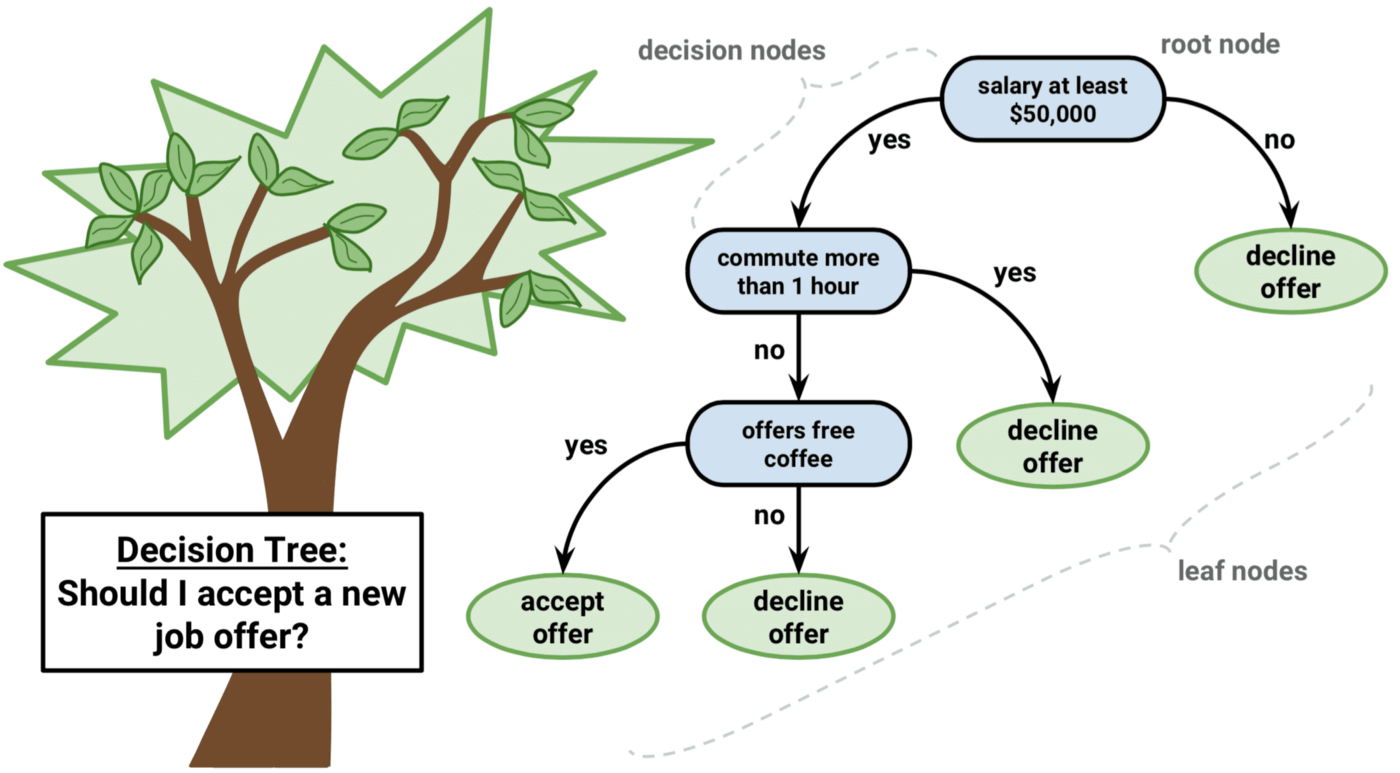

In [7]:
# Random Forest/DT -> feature importance

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [9]:
X, y = iris[['sepal length (cm)','sepal width (cm)']], iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,shuffle=True,random_state=42)

In [10]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

In [11]:
y_train.value_counts()

2    35
1    35
0    35
Name: target, dtype: int64

In [12]:
y_test.value_counts()

2    15
1    15
0    15
Name: target, dtype: int64

In [13]:
# label distribution on train and test must be similar

In [14]:
tree = DecisionTreeClassifier(
    max_depth = 5,
    max_features = 2
)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [15]:
y_pred = tree.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.67      0.53      0.59        15
           2       0.67      0.67      0.67        15

    accuracy                           0.73        45
   macro avg       0.72      0.73      0.72        45
weighted avg       0.72      0.73      0.72        45



In [17]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

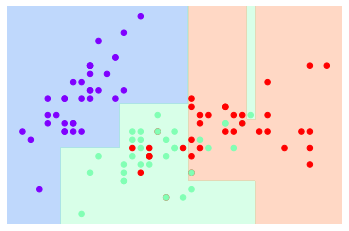

In [18]:
visualize_classifier(tree, X_train, y_train)

[Text(544.921875, 498.3, 'sepal length (cm) <= 5.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(261.5625, 407.70000000000005, 'sepal width (cm) <= 2.8\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(174.375, 317.1, 'sepal length (cm) <= 4.75\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(87.1875, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(261.5625, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(348.75, 317.1, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(828.28125, 407.70000000000005, 'sepal length (cm) <= 6.25\ngini = 0.539\nsamples = 70\nvalue = [3, 32, 35]'),
 Text(523.125, 317.1, 'sepal width (cm) <= 3.35\ngini = 0.479\nsamples = 34\nvalue = [3, 23, 8]'),
 Text(435.9375, 226.5, 'sepal length (cm) <= 5.55\ngini = 0.383\nsamples = 31\nvalue = [0, 23, 8]'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(523.125, 135.89999999999998, 'sepal width (cm) <= 2.85\ngini = 0.417\nsa

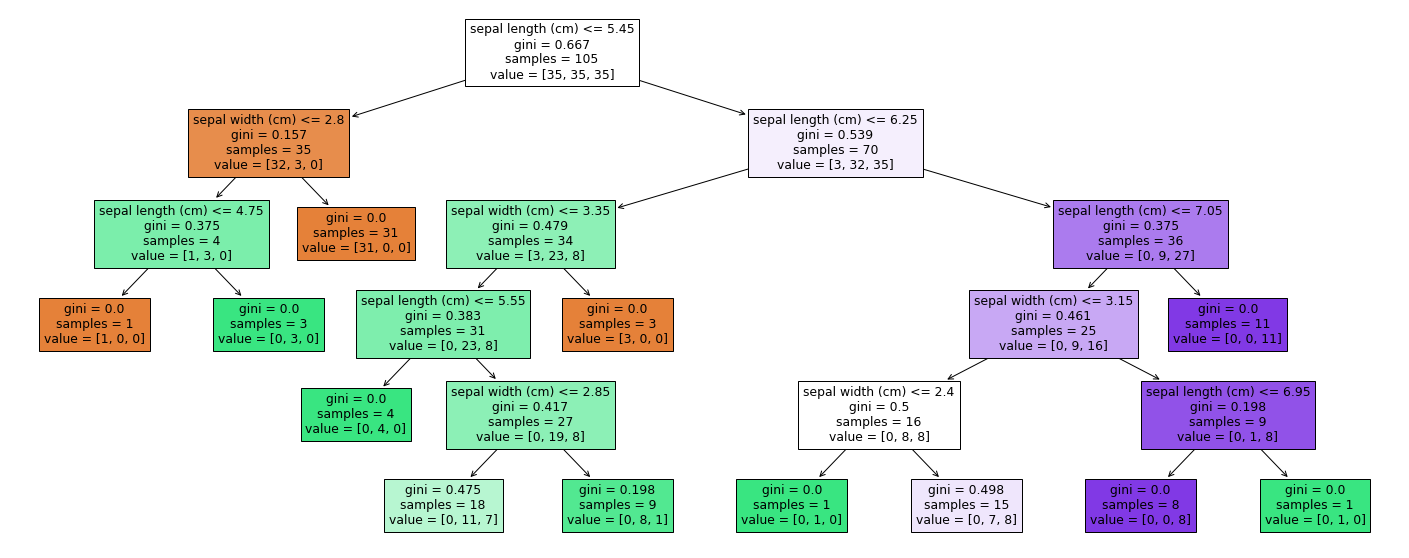

In [22]:
plt.figure(figsize=(25,10))
plot_tree(tree, feature_names=X_train.columns, filled=True)

- **Preprunning**: DecisionTreeClassifer(): max_depth, max_features, min_sample_split, min_sample_leaf
- **Postprunning**: costcomplexityprunning()

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [ ]:
# 80% data each group, different data set (RF) -> bagging
# sequential learning (adaboost) -> boosting

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
forest = RandomForestClassifier(
    # max_features
    # max_depth
    # n_estimator = number of decision tree
    # random_state
)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred1 = forest.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.57      0.53      0.55        15
           2       0.57      0.53      0.55        15

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.68      0.69      0.68        45



In [ ]:
# compare to DT

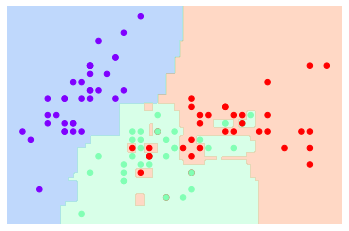

In [27]:
visualize_classifier(forest, X_train, y_train)

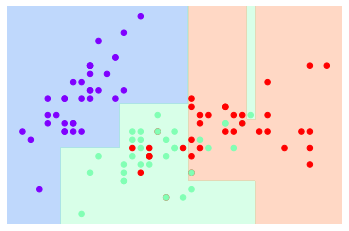

In [28]:
visualize_classifier(tree, X_train, y_train)

In [29]:
forest.estimators_[:6]

[DecisionTreeClassifier(max_features='auto', random_state=483757376),
 DecisionTreeClassifier(max_features='auto', random_state=106075702),
 DecisionTreeClassifier(max_features='auto', random_state=1976656983),
 DecisionTreeClassifier(max_features='auto', random_state=906613443),
 DecisionTreeClassifier(max_features='auto', random_state=27652876),
 DecisionTreeClassifier(max_features='auto', random_state=2145423800)]

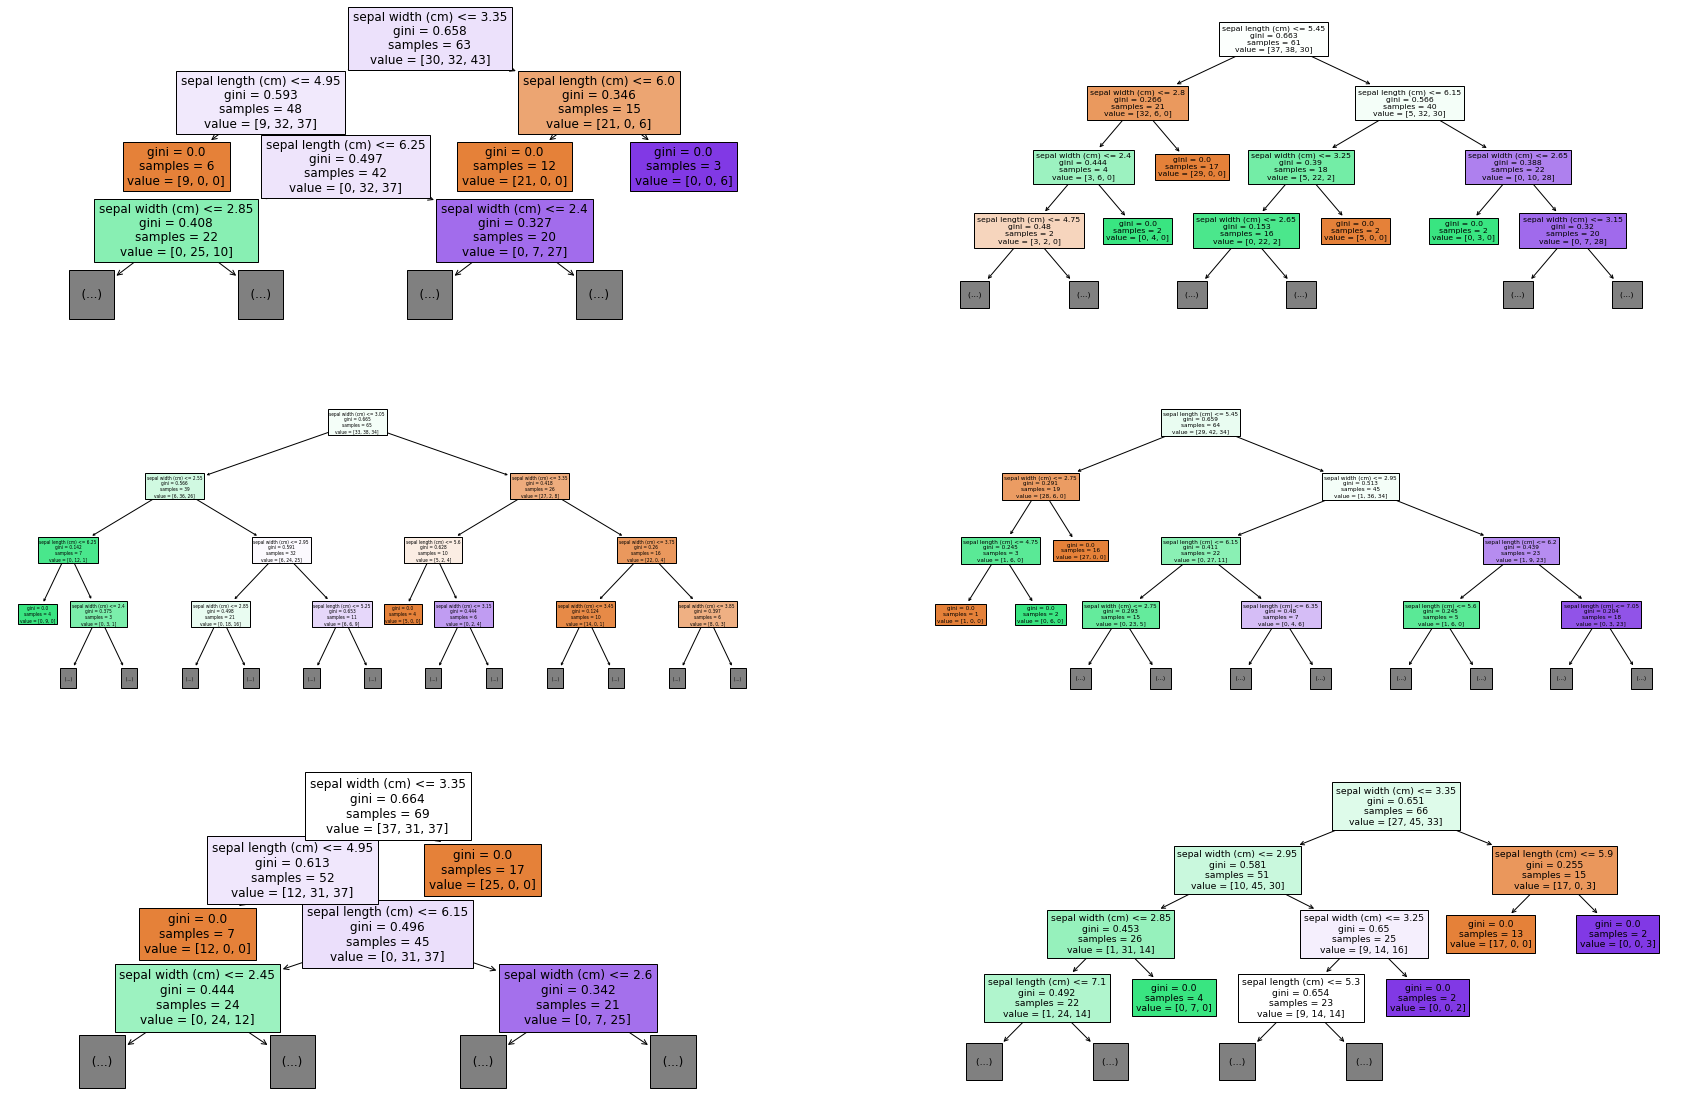

In [33]:
fig, axs = plt.subplots(3, 2, figsize=(30,20))

for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris.columns, max_depth=3, filled=True, ax=ax)

**Random forest**:
1. Bao nhieu cay thi la du? 
2. Bao nhieu tang thi la du? -> experiments: **log2(n_features)**
3. Bao nhieu bien thi la du?

In [ ]:
# max_features -> sqrt(total_features)
# max_depth -> log2(total_features)
# n_estimators -> total_feature - max_features + 1
# max_sample -> 0.8

In [34]:
names = X_train.columns.to_list()
names

['sepal length (cm)', 'sepal width (cm)']

In [35]:
importance = forest.feature_importances_
importance

array([0.64074226, 0.35925774])

In [36]:
pd.DataFrame({'names':names,
             'importance':importance})

,names,importance
0,sepal length (cm),0.640742
1,sepal width (cm),0.359258


In [37]:
from sklearn.feature_selection import SelectFromModel

In [38]:
selector = SelectFromModel(forest, threshold=0.4)
selector

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.4)

In [39]:
X_important = selector.fit_transform(X_train, y_train)
X_important

array([[5.1],
       [6.2],
       [5.1],
       [6.8],
       [5.7],
       [6.7],
       [4.9],
       [5.1],
       [4.4],
       [7.1],
       [6.5],
       [4.9],
       [5. ],
       [6. ],
       [5.5],
       [7.2],
       [5. ],
       [4.7],
       [6.7],
       [5.9],
       [5.4],
       [6.3],
       [7.6],
       [7.7],
       [5.7],
       [4.6],
       [5.1],
       [5.4],
       [6.9],
       [5.5],
       [5.7],
       [5.1],
       [5.8],
       [5.6],
       [4.8],
       [4.8],
       [6.7],
       [6.3],
       [7.9],
       [5.1],
       [6.4],
       [4.6],
       [6. ],
       [5.5],
       [6.3],
       [6. ],
       [4.8],
       [7.7],
       [6.1],
       [5.7],
       [5.8],
       [4.5],
       [5.5],
       [6.4],
       [6.1],
       [6.3],
       [5.1],
       [5.7],
       [5. ],
       [6.7],
       [6.8],
       [5.2],
       [7.2],
       [6. ],
       [6.4],
       [6.3],
       [5.6],
       [4.9],
       [6.9],
       [6.5],
       [5.6],
      

### SVM

In [48]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Bias - Variance**
- Bias = Sum(Predict - Label)
- Variance 

**Overfit - Fit - Underfit**
- Bias - Variance?
- Evaluation metric train vs test?

**SVM**
Non-linear:
- Soft margin
- Kernel tricks

In [40]:
y.unique()

array([0, 1, 2])

In [42]:
y_binary = y.gt(0).astype(int)
y_binary.unique()
# gt -> greater than

array([0, 1])

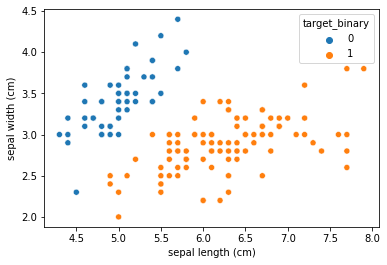

In [43]:
iris['target_binary'] = y_binary
sns.scatterplot(data=iris,
               x='sepal length (cm)',
               y='sepal width (cm)',
               hue= 'target_binary')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal length (cm)', 'sepal width (cm)']],
                                                   iris['target_binary'],
                                                   test_size=0.2, random_state=42)

In [53]:
from sklearn.svm import SVC
svc = SVC(C=10, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [54]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



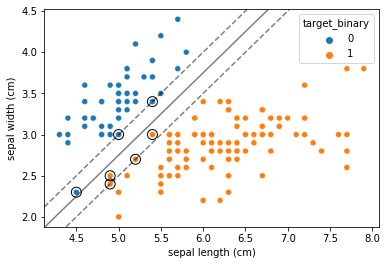

In [55]:
ax = sns.scatterplot(data=iris,
                    x='sepal length (cm)',
                    y='sepal width (cm)',
                    hue='target_binary')
plot_svc_decision_function(svc, ax=ax, plot_support=True)